In [ ]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.mapping import rc_to_nest
from IPython.display import SVG

with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [3]:
fn = "mapped_decarbs_x_imt_rules.parquet"
df = pd.read_parquet(Path(cfg.processed_data) / "pathway" / fn)
df["reaction_center"] = df["reaction_center"].apply(rc_to_nest)
print(len(df))
df.head()

86


rxn_id                                             smarts  \
0  10184           O=C(O)C(O)C(O)C(=O)O>>O=C(O)C(O)CO.O=C=O   
1  10213                       CCCC(=O)C(=O)O>>CCCC=O.O=C=O   
2  10234             O=C(O)CCC(=O)C(=O)O>>O=CCCC(=O)O.O=C=O   
3  10268                 CCC(C)C(=O)C(=O)O>>CCC(C)C=O.O=C=O   
4  10549  O=C(O)c1cc(O)c(O)cc1C(=O)O>>O=C(O)c1ccc(O)c(O)...   

                                           am_smarts  \
0  [O:10]=[C:8]([OH:9])[CH:1]([OH:2])[CH:3]([OH:4...   
1  [CH3:5][CH2:4][CH2:2][C:1](=[O:3])[C:6](=[O:8]...   
2  [O:6]=[C:5]([OH:7])[CH2:4][CH2:2][C:1](=[O:3])...   
3  [CH3:6][CH2:4][CH:2]([CH3:5])[C:1](=[O:3])[C:7...   
4  [O:14]=[C:12]([OH:13])[c:1]1[cH:2][c:4]([OH:7]...   

                                                rule  \
0  [#6;$([#6&!R](-&!@[#6&!R]=&!@[#8&!R])-&!@[#6&!...   
1  [#6;$([#6&!R]-&!@[#6&!R]=&!@[#8&!R]);!$([#6&!R...   
2  [#6;$([#6&!R]-&!@[#6&!R]=&!@[#8&!R]);!$([#6&!R...   
3  [#6;$([#6&!R]-&!@[#6&!R]=&!@[#8&!R]);!$([#6&!R...   
4  [#6;!$([#6&!R](-&!@[#6&!R]-&!@[#6&R]1:&@[#6&R]...   

                  reaction_center  rule_id  
0  (((3, 1, 2),), ((0,), (0, 1)))     2255  
1  (((3, 5, 7),), ((0,), (0, 1)))      462  
2  (((5, 7, 9),), ((0,), (0, 1)))      462  
3  (((4, 6, 8),), ((0,), (0, 1)))      462  
4  (((3, 1, 2),), ((0,), (0, 1)))     2839

Reaction: 10213


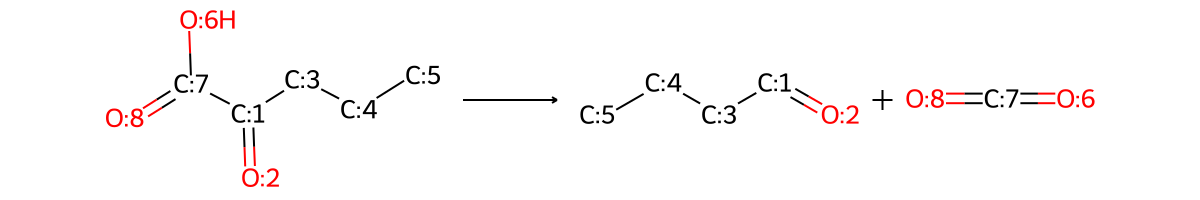

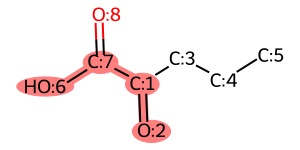

Reaction: 10234


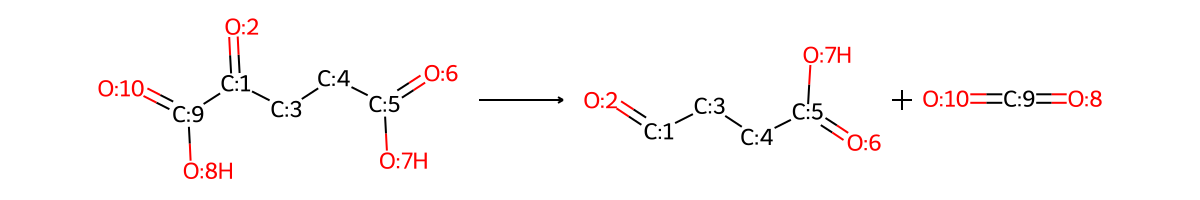

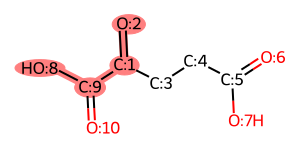

Reaction: 10268


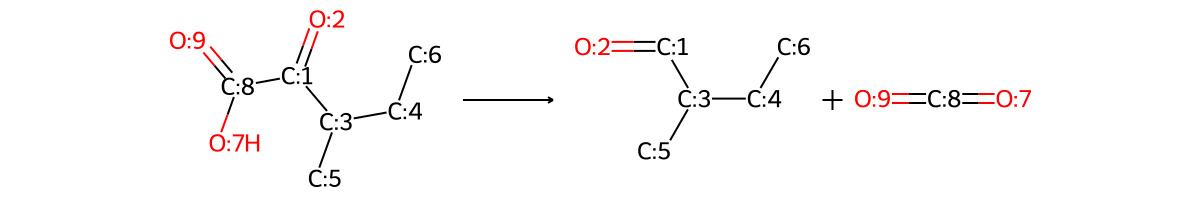

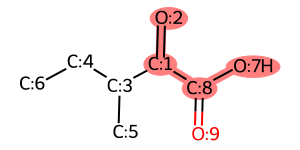

Reaction: 10634


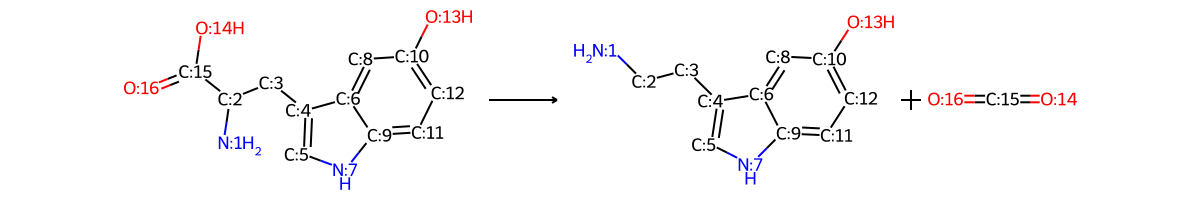

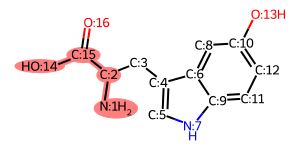

Reaction: 1067


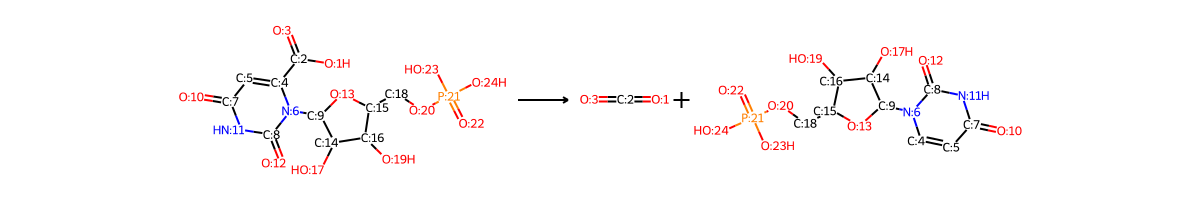

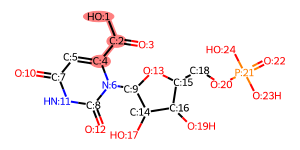

Reaction: 11336


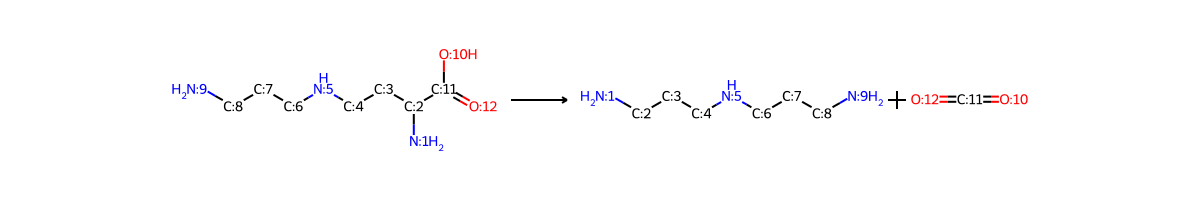

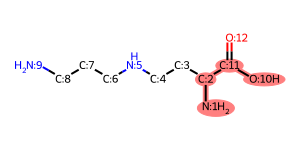

Reaction: 11349


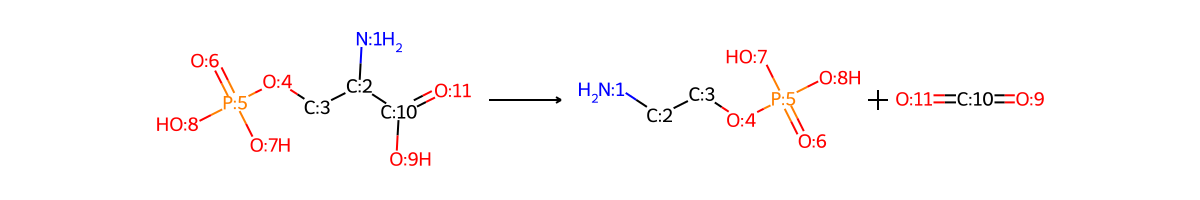

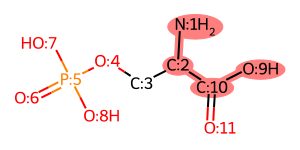

Reaction: 1162


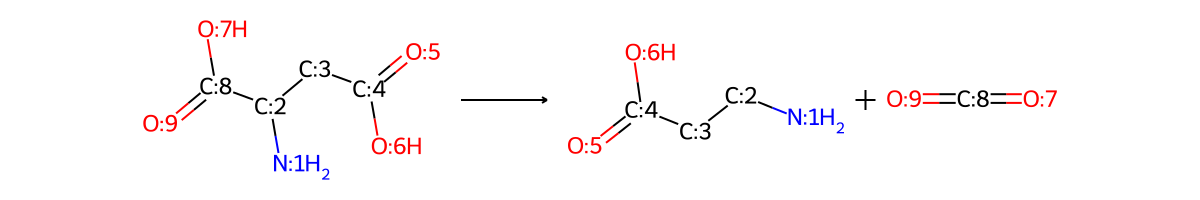

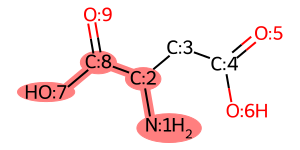

Reaction: 12307


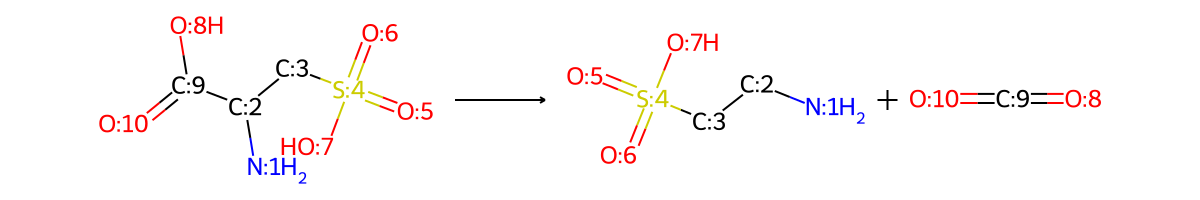

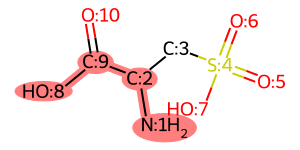

Reaction: 12520


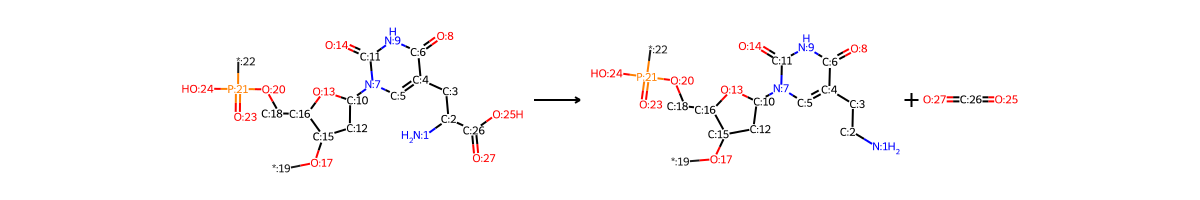

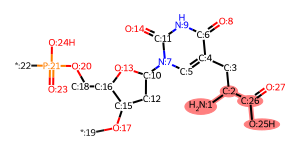

Reaction: 12619


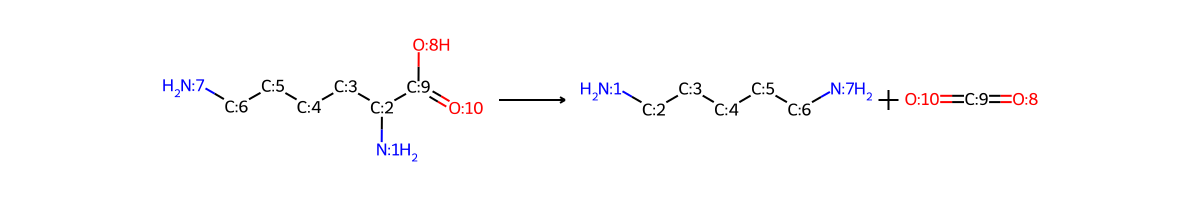

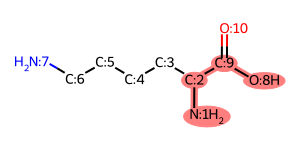

Reaction: 12879


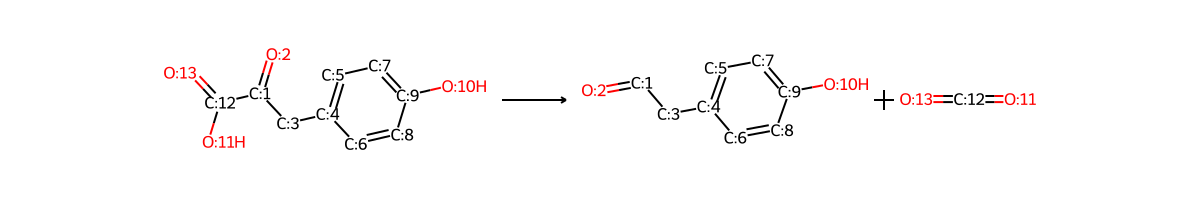

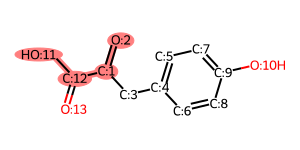

Reaction: 12995


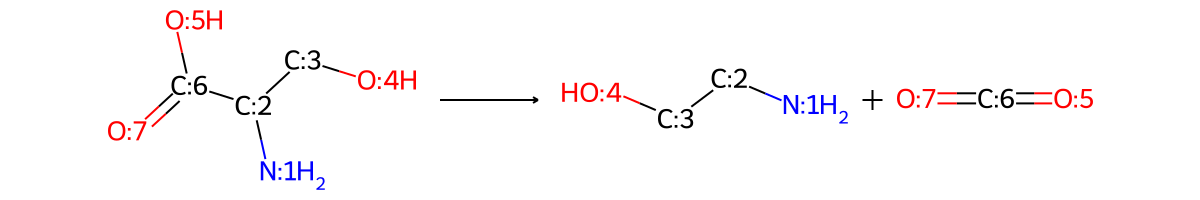

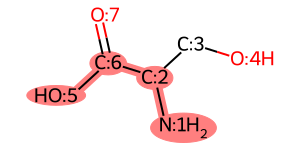

Reaction: 13477


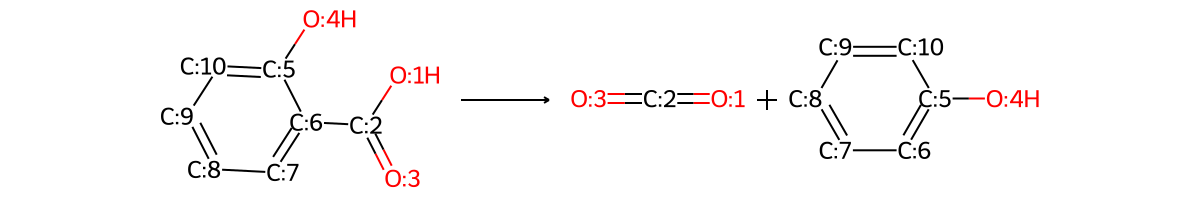

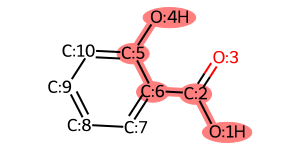

Reaction: 14


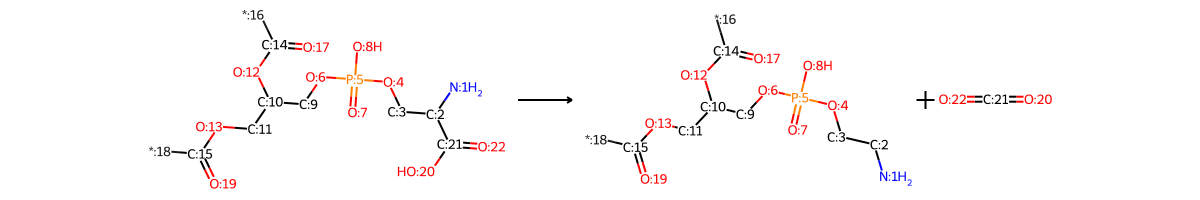

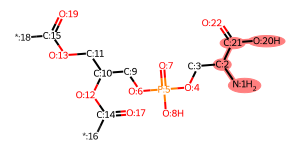

Reaction: 14059


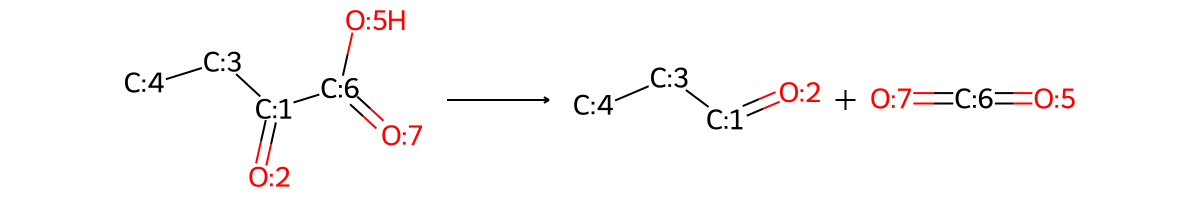

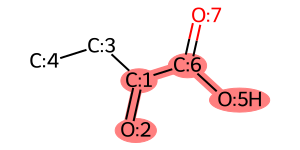

Reaction: 14700


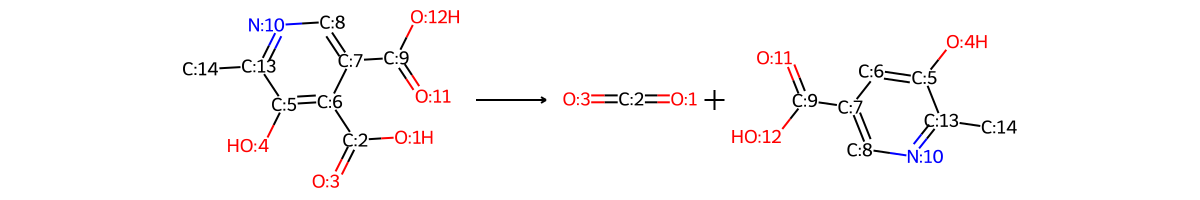

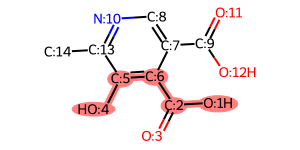

Reaction: 14999


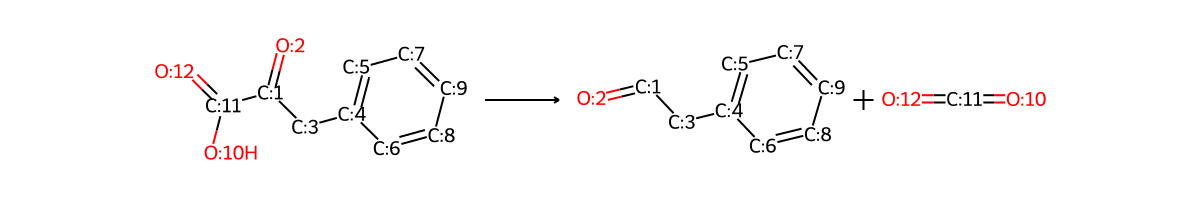

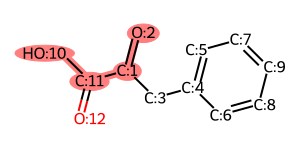

Reaction: 15539


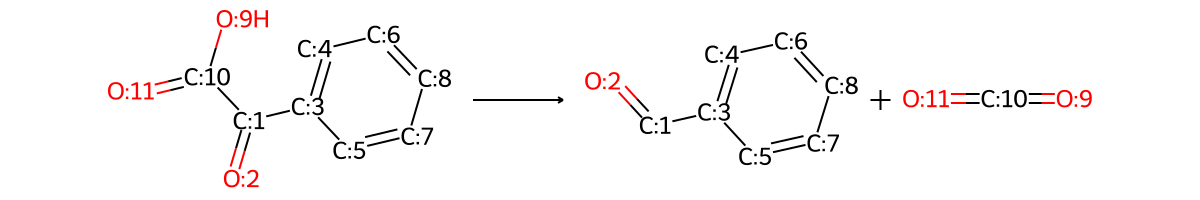

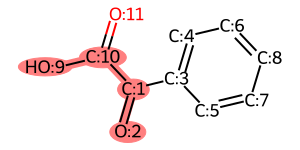

Reaction: 15761


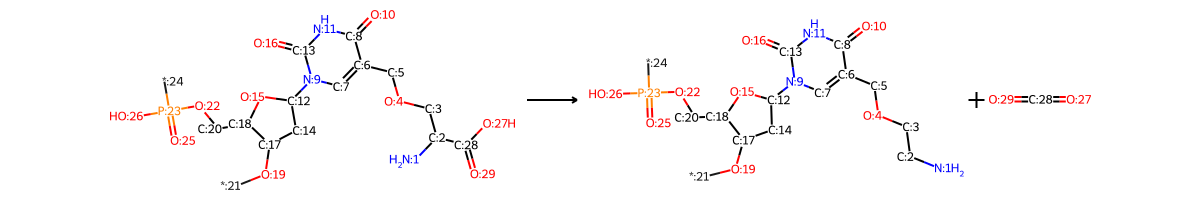

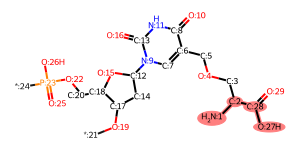

Reaction: 16650


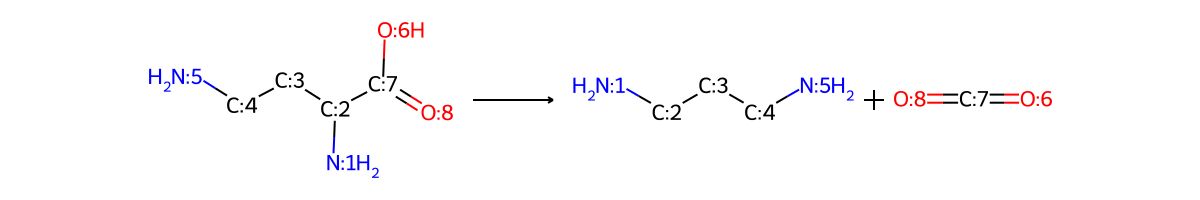

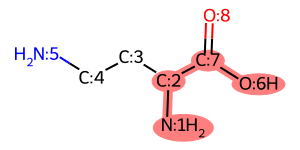

Reaction: 16821


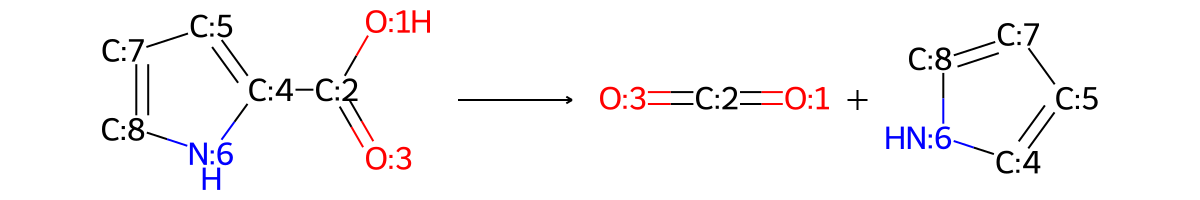

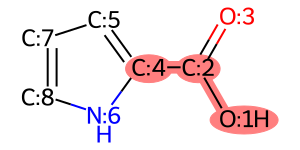

Reaction: 16979


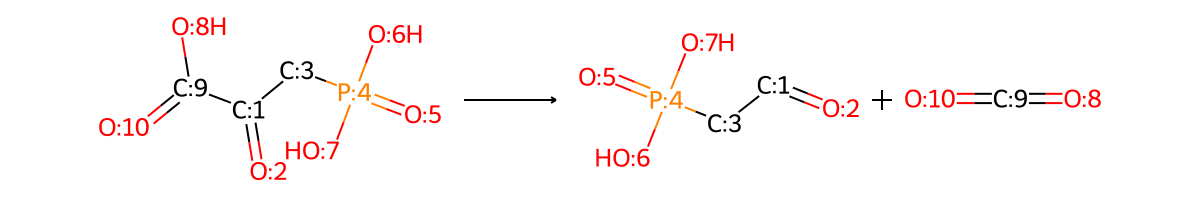

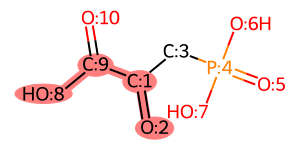

Reaction: 17153


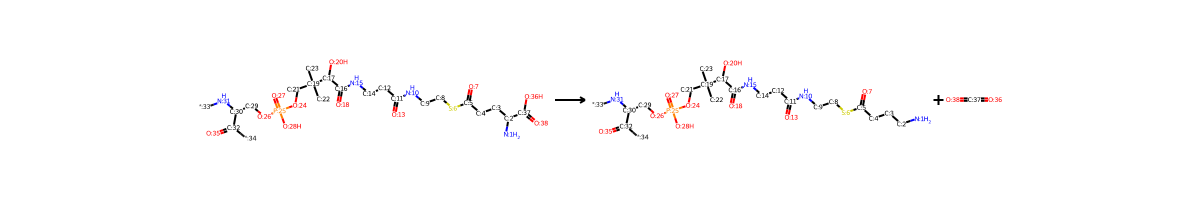

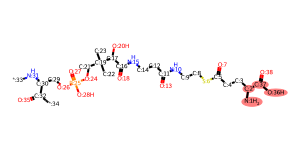

Reaction: 17802


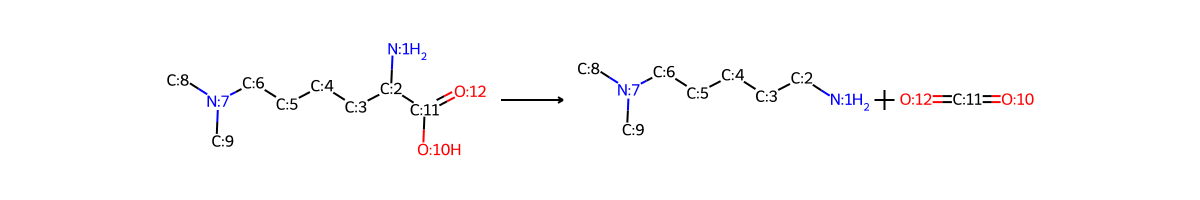

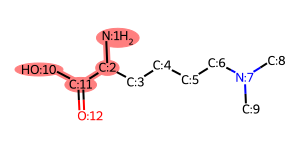

Reaction: 1814


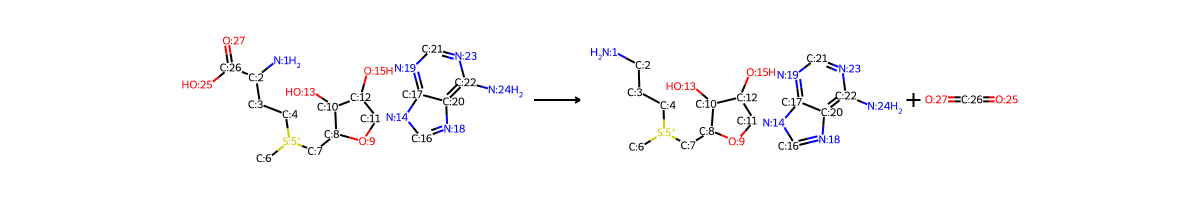

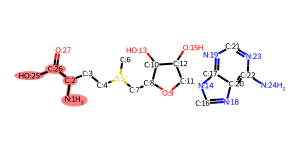

Reaction: 18393


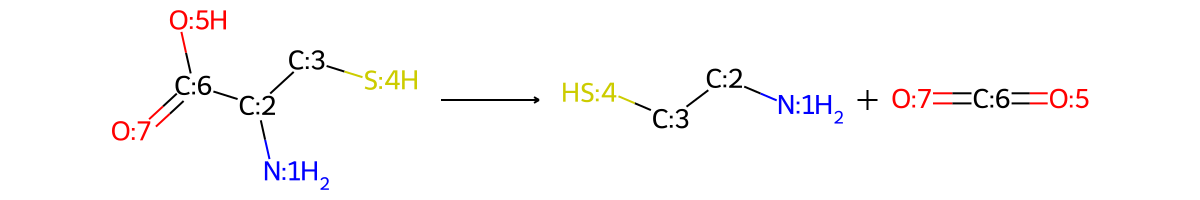

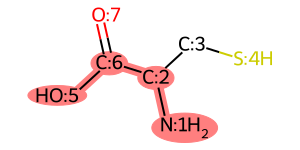

Reaction: 18573


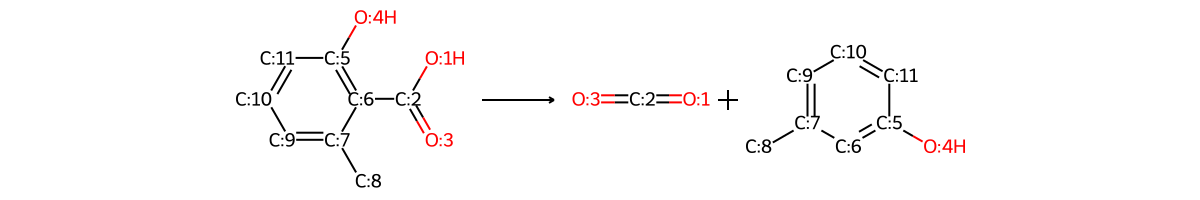

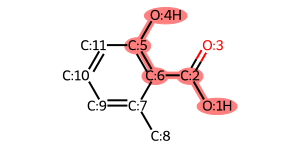

Reaction: 19445


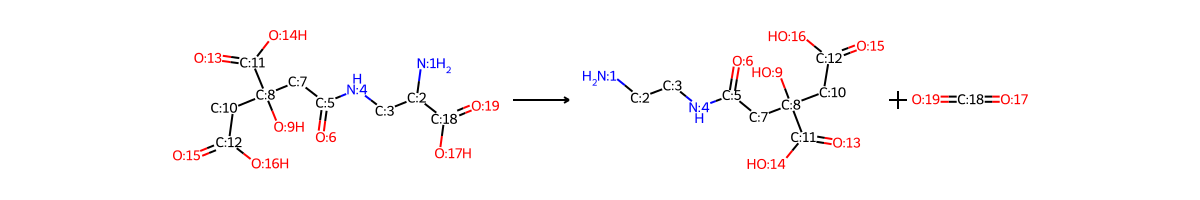

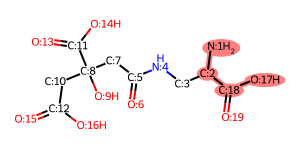

Reaction: 20241


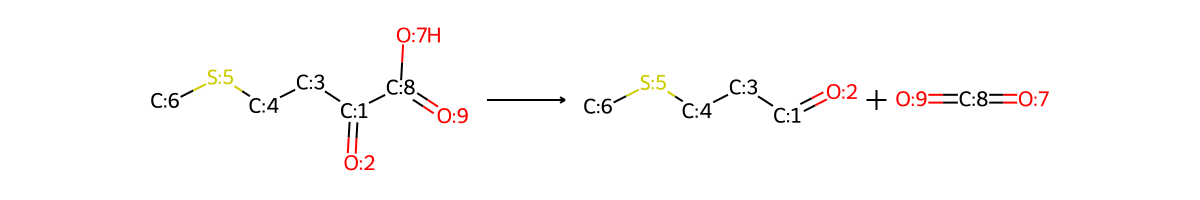

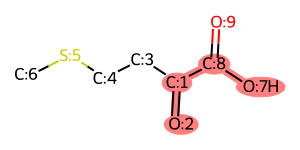

Reaction: 2556


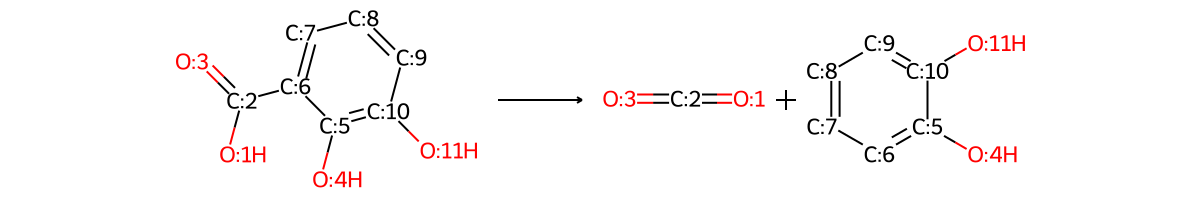

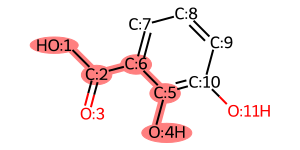

Reaction: 2589


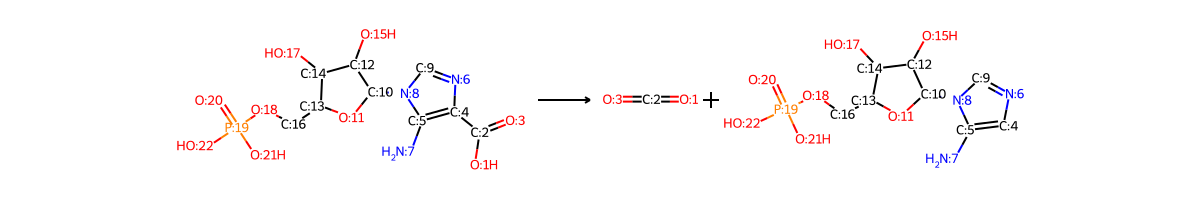

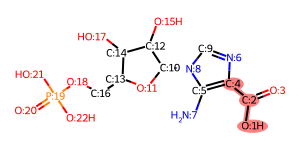

Reaction: 2688


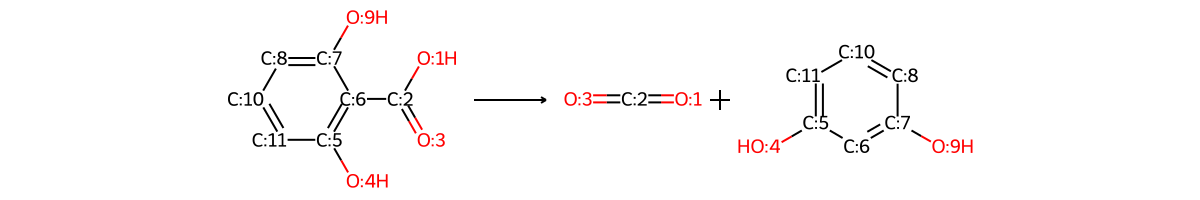

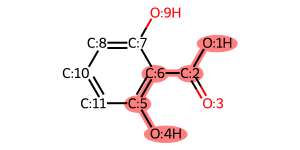

Reaction: 3306


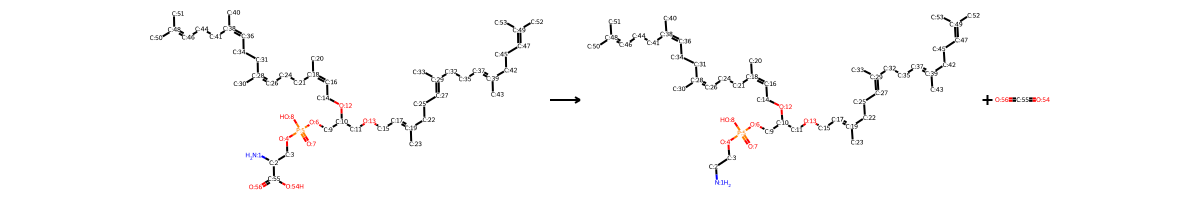

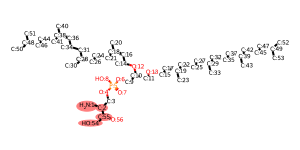

Reaction: 4324


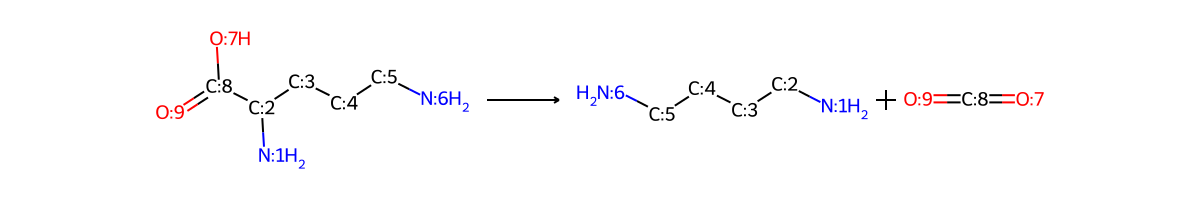

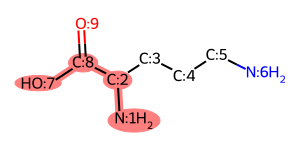

Reaction: 5000


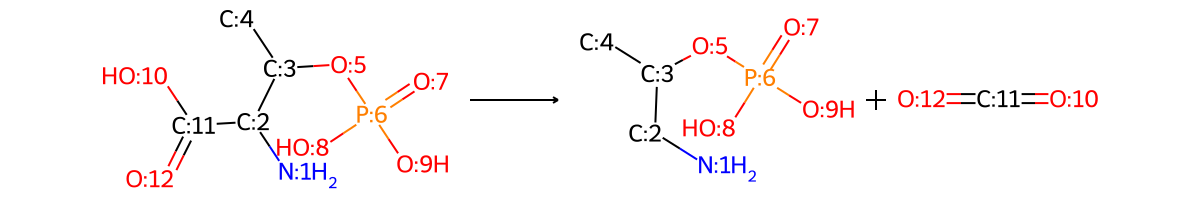

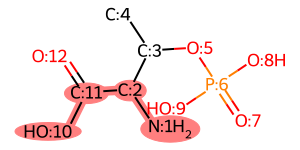

Reaction: 5026


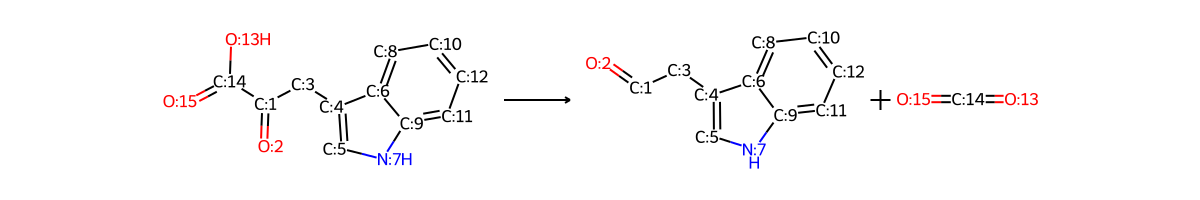

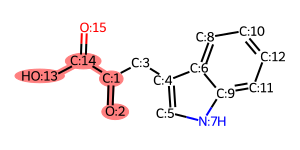

Reaction: 5043


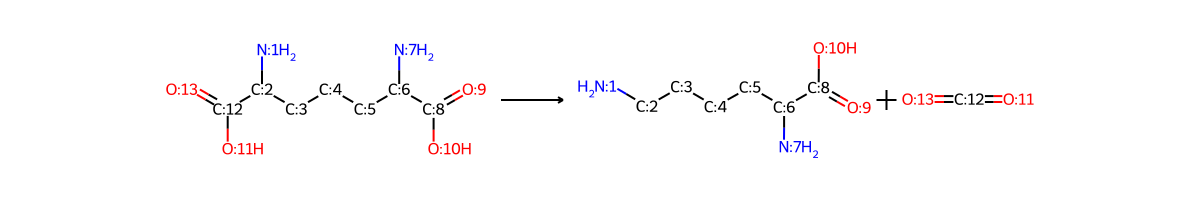

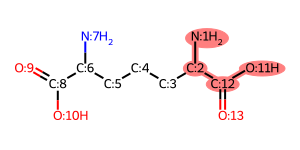

Reaction: 5140


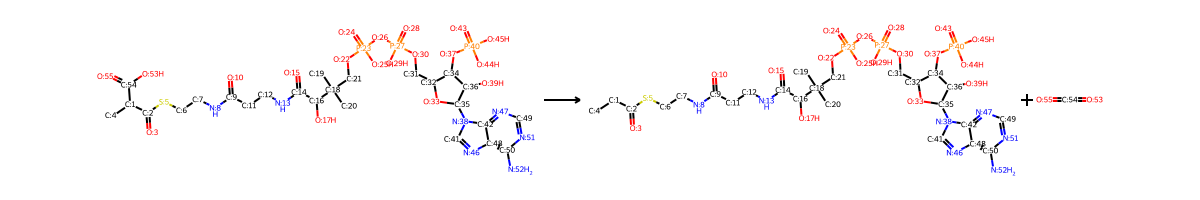

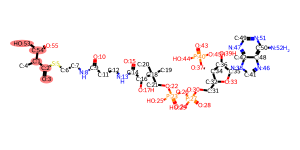

Reaction: 5401


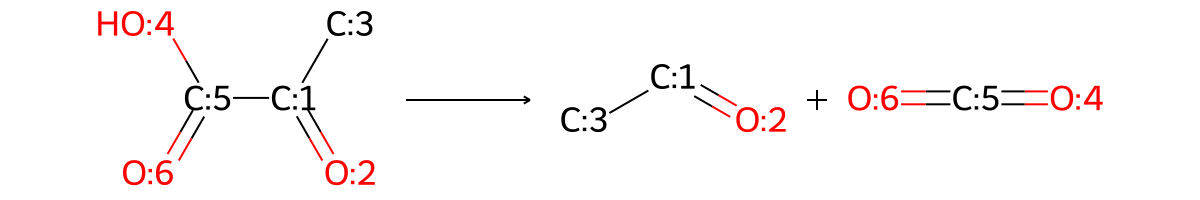

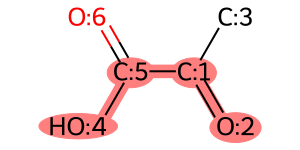

Reaction: 55


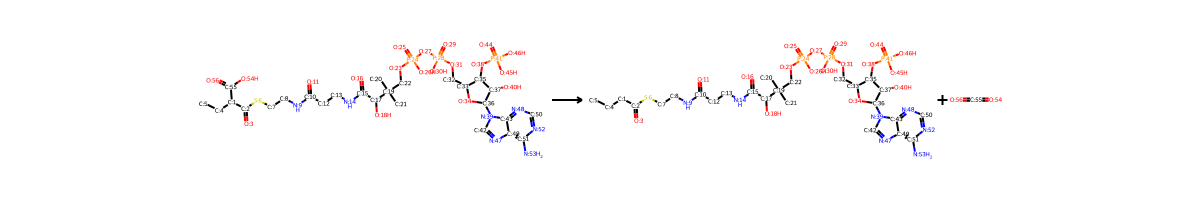

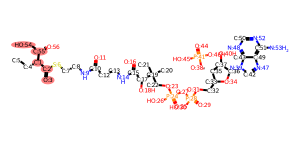

Reaction: 5645


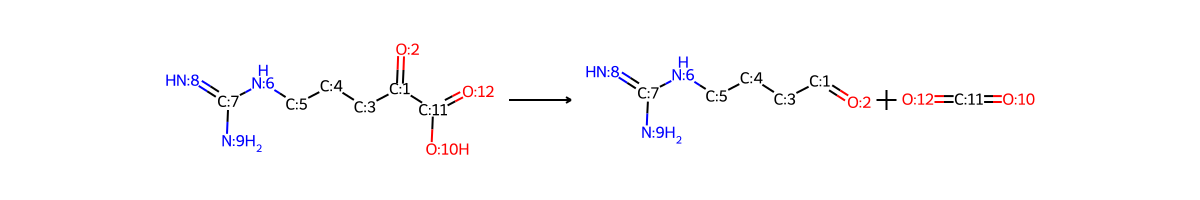

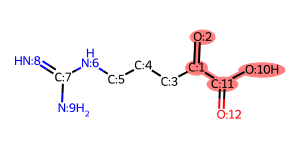

Reaction: 5907


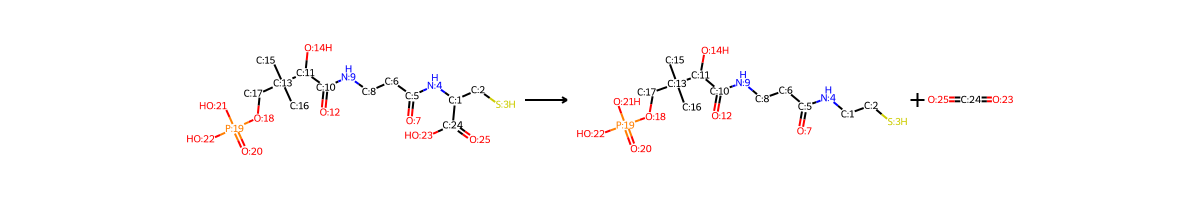

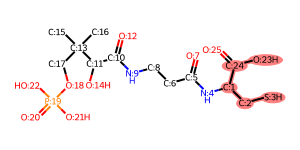

Reaction: 6882


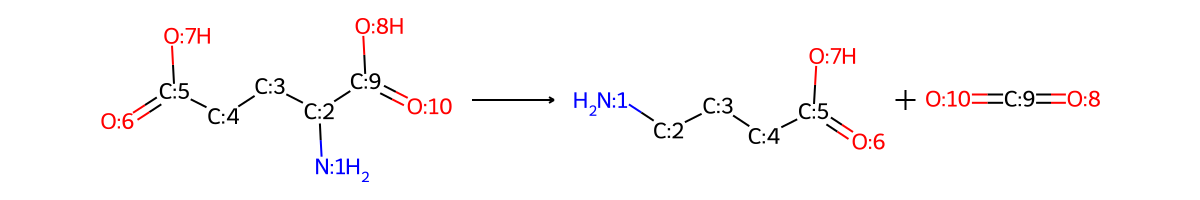

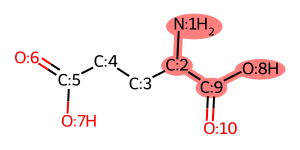

Reaction: 7059


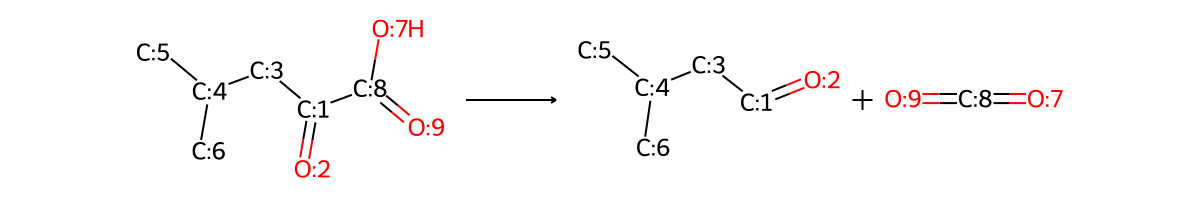

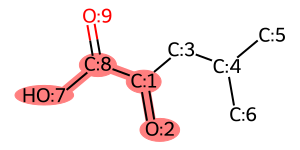

Reaction: 7099


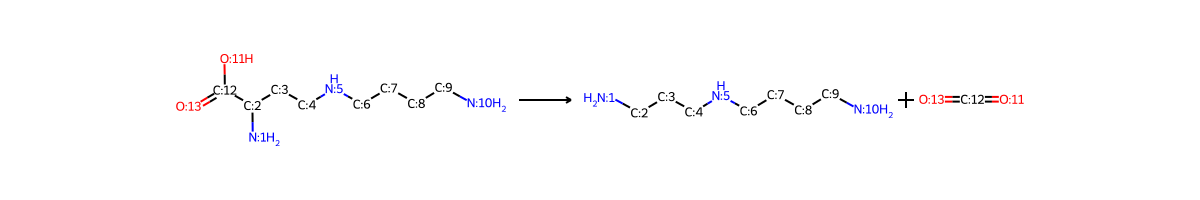

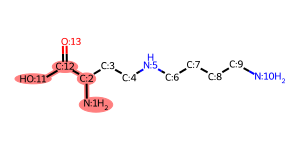

Reaction: 734


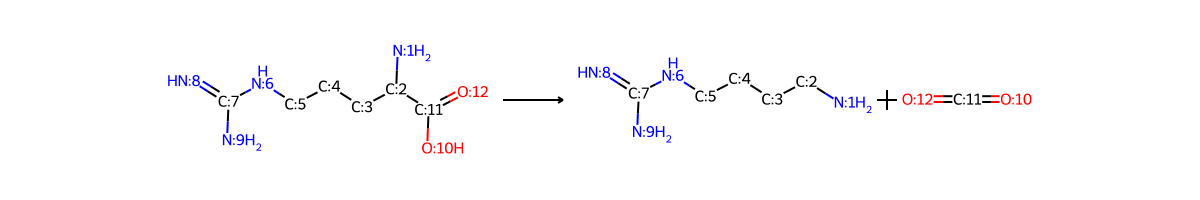

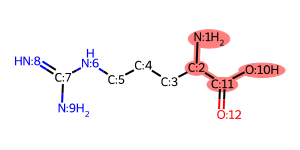

Reaction: 7342


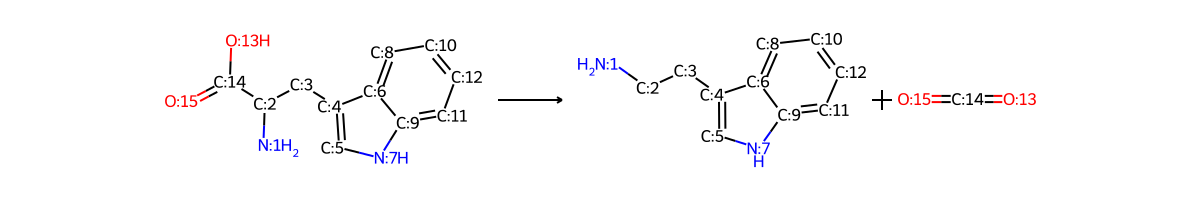

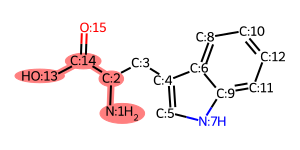

Reaction: 7354


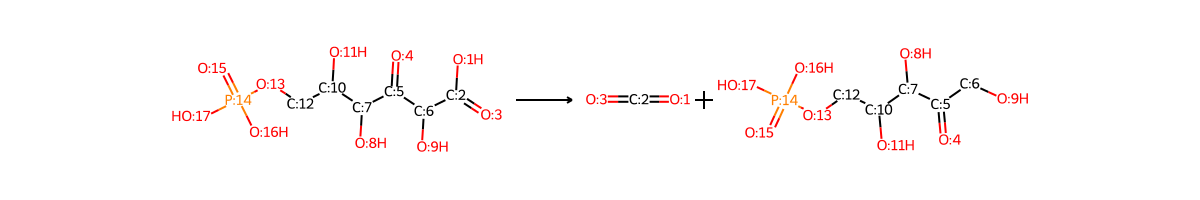

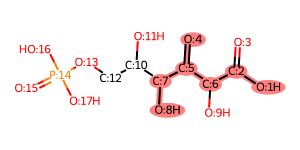

Reaction: 7561


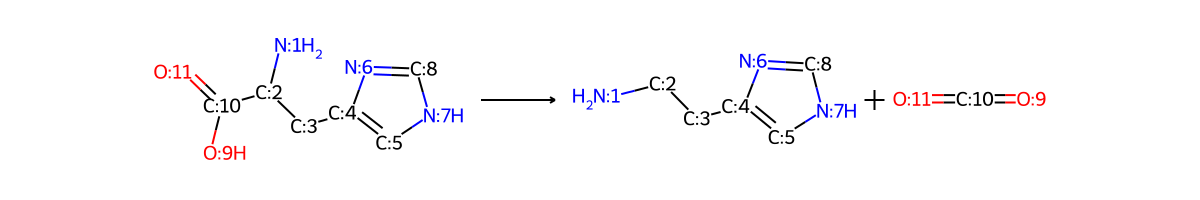

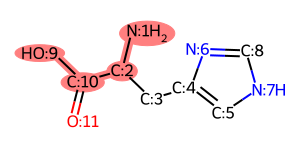

Reaction: 7754


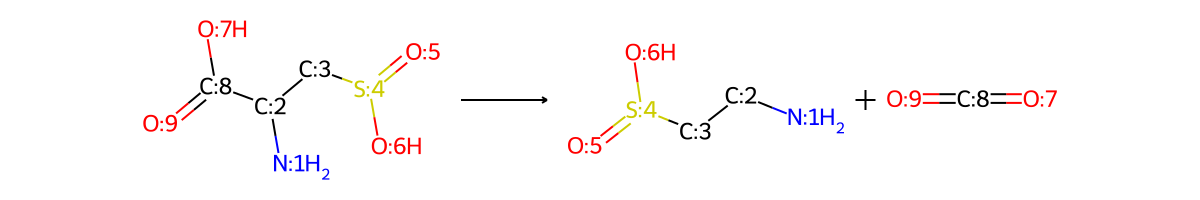

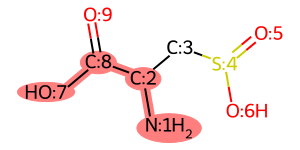

Reaction: 7914


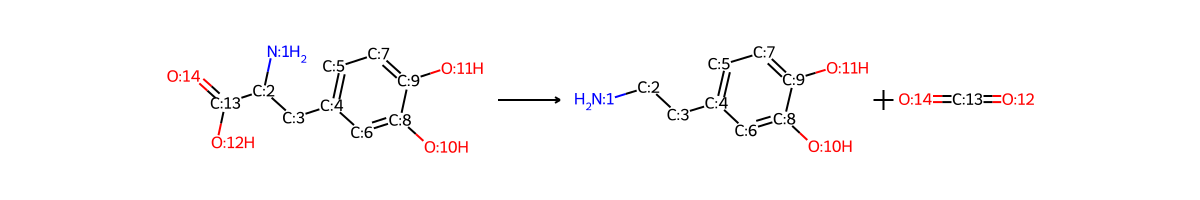

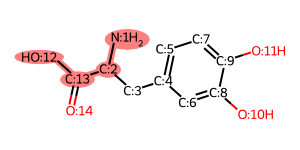

Reaction: 8894


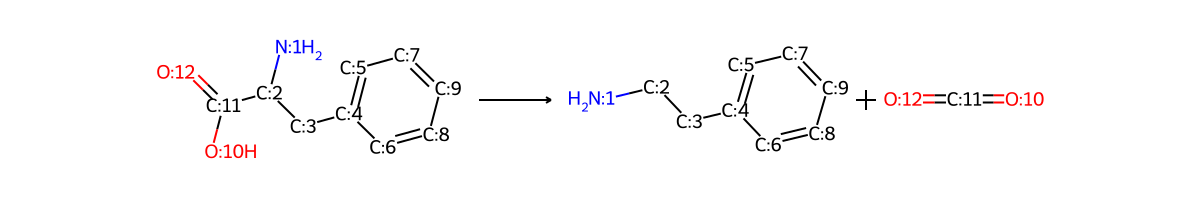

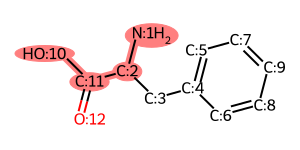

Reaction: 9307


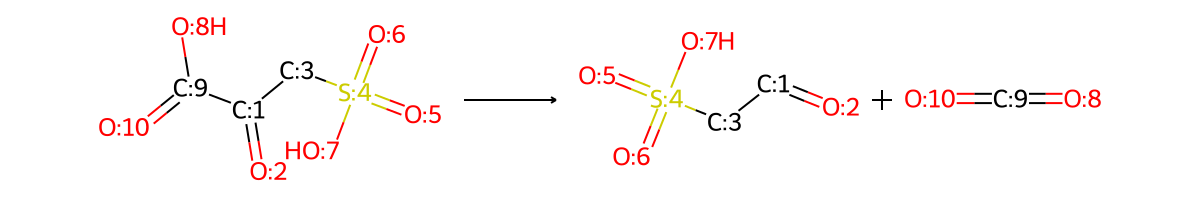

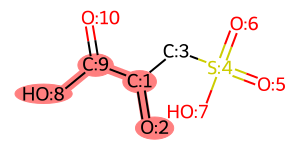

Reaction: 9371


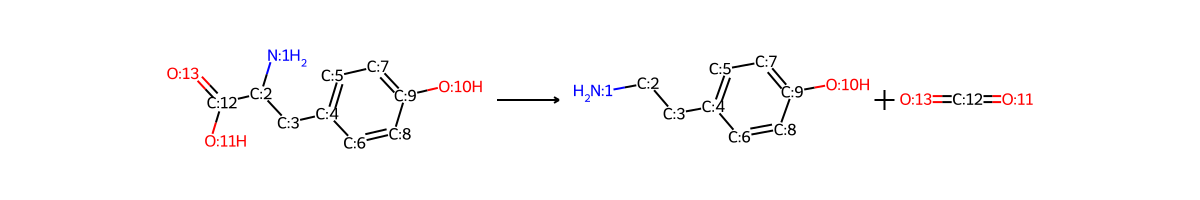

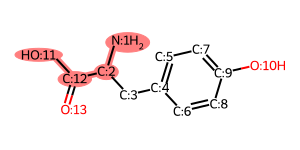

Reaction: 9452


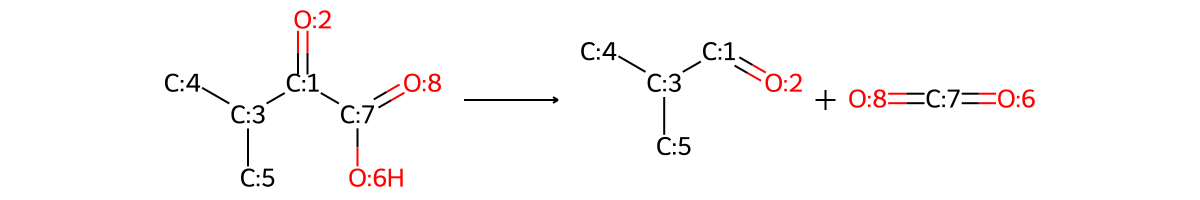

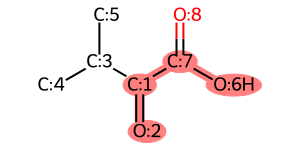

In [20]:
for _, row in df.iterrows():
    print(f"Reaction: {row['rxn_id']}")
    display(SVG(draw_reaction(row["am_smarts"])))
    for smi, rc in zip(row["am_smarts"].split(">>")[0].split("."), row["reaction_center"][0]):
        display(SVG(draw_molecule(smi, size=(300, 150), highlight_atoms=rc)))